In [1]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=1000,
    noise=0.2,
    random_state=42
)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 2)
y shape: (1000,)


In [2]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y
df.to_csv("moons.csv", index=False)

print("moons.csv saved successfully")


moons.csv saved successfully


In [3]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


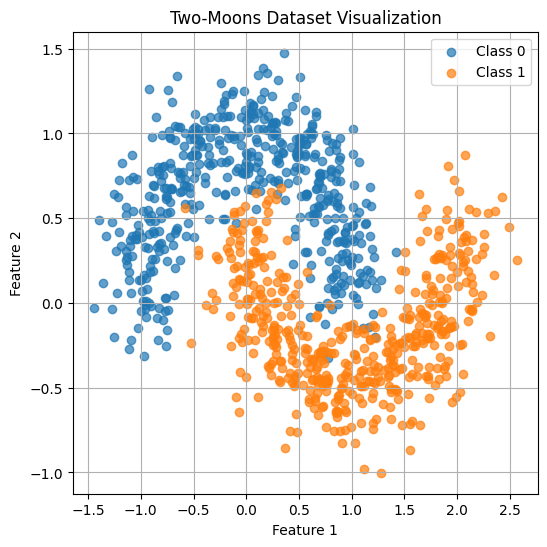

In [6]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(
    n_samples=1000,
    noise=0.2,
    random_state=42
)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(
    X[y == 0][:, 0], X[y == 0][:, 1],
    label="Class 0", alpha=0.7
)
plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1],
    label="Class 1", alpha=0.7
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Two-Moons Dataset Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [5]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32, shuffle=True
)


In [7]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
class MoonNet(nn.Module):
    def __init__(self, activation):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)
        self.act = activation

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        return torch.sigmoid(self.fc3(x))


In [8]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
def train_model(activation_fn, lr=0.001, epochs=50):
    model = MoonNet(activation_fn)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []
    initial_loss = None

    for epoch in range(epochs):
        epoch_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        losses.append(epoch_loss)

        if epoch == 0:
            initial_loss = epoch_loss

    def accuracy(x, y):
        with torch.no_grad():
            preds = (model(x) > 0.5).float()
            return (preds.eq(y).sum() / y.shape[0]).item()

    return {
        "initial_loss": initial_loss,
        "train_acc": accuracy(X_train_t, y_train_t),
        "test_acc": accuracy(X_test_t, y_test_t),
        "losses": losses
    }

##EXERCISE 1 - Comparative Study of Activation Functions

In [9]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU()
}

results_pt = {}
for name, act in activations.items():
    results_pt[name] = train_model(act)

results_pt

{'Sigmoid': {'initial_loss': 0.7087104177474975,
  'train_acc': 0.8687499761581421,
  'test_acc': 0.8500000238418579,
  'losses': [0.7087104177474975,
   0.6892985105514526,
   0.6799876642227173,
   0.6716880869865417,
   0.6620098638534546,
   0.6494675588607788,
   0.6333447980880738,
   0.6135891079902649,
   0.5892219877243042,
   0.5620854616165161,
   0.5322116482257843,
   0.5013870012760162,
   0.472157164812088,
   0.445721333026886,
   0.42212716341018675,
   0.4027480638027191,
   0.3867565965652466,
   0.37295880675315857,
   0.3622904908657074,
   0.35328493475914,
   0.3460086572170258,
   0.3398260724544525,
   0.3346986275911331,
   0.33070878565311435,
   0.327095599770546,
   0.3240725541114807,
   0.32248233020305633,
   0.3197904342412949,
   0.31781013488769533,
   0.31693270683288577,
   0.31525089621543884,
   0.31428750514984133,
   0.3132315218448639,
   0.3123438769578934,
   0.31191892504692076,
   0.3111959648132324,
   0.31096806228160856,
   0.31068383693

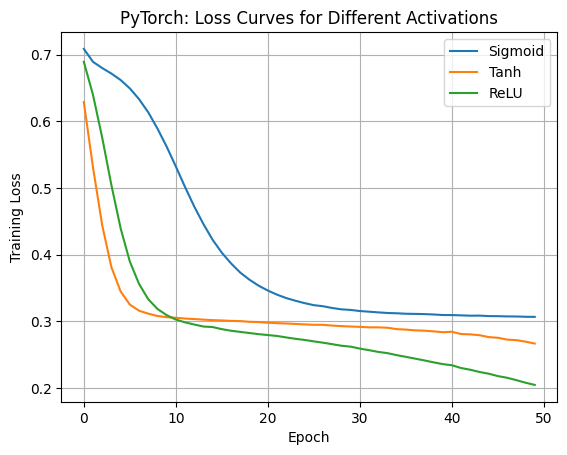

In [18]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure()
for name, res in results_pt.items():
    plt.plot(res["losses"], label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("PyTorch: Loss Curves for Different Activations")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import pandas as pd

pt_table = pd.DataFrame([
    {
        "Activation": name,
        "Initial Loss": round(res["initial_loss"], 4),
        "Final Train Accuracy": round(res["train_acc"], 4),
        "Final Test Accuracy": round(res["test_acc"], 4)
    }
    for name, res in results_pt.items()
])

pt_table

,Activation,Initial Loss,Final Train Accuracy,Final Test Accuracy
0,Sigmoid,0.7087,0.8687,0.850
1,Tanh,0.6289,0.8875,0.885
2,ReLU,0.6893,0.9187,0.915


##EXERCISE 2 - Effect of Activation Function on Convergence Speed



In [10]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
def convergence_epoch(losses, threshold=0.001, patience=5):
    for i in range(len(losses) - patience):
        diffs = [abs(losses[i+j] - losses[i+j+1]) for j in range(patience)]
        if all(d < threshold for d in diffs):
            return i + 1
    return None

for name, res in results_pt.items():
    print(
        name,
        "Converges at epoch:",
        convergence_epoch(res["losses"]),
        "| Loss Curve:",
        "Smooth" if name != "ReLU" else "Fast"
    )

Sigmoid Converges at epoch: 33 | Loss Curve: Smooth
Tanh Converges at epoch: 12 | Loss Curve: Smooth
ReLU Converges at epoch: None | Loss Curve: Fast


##EXERCISE 3

In [11]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
learning_rates = [0.0005, 0.01]

lr_results_pt = {}

for name, act in activations.items():
    for lr in learning_rates:
        key = f"{name}_LR_{lr}"
        lr_results_pt[key] = train_model(act, lr=lr)

lr_results_pt

{'Sigmoid_LR_0.0005': {'initial_loss': 0.6915115165710449,
  'train_acc': 0.8662499785423279,
  'test_acc': 0.8550000190734863,
  'losses': [0.6915115165710449,
   0.684760971069336,
   0.6794254636764526,
   0.6751950979232788,
   0.6694665431976319,
   0.6635963678359985,
   0.6568624520301819,
   0.6492816257476807,
   0.6405009055137634,
   0.6305648827552796,
   0.6193668508529663,
   0.6071121597290039,
   0.5938764333724975,
   0.5790307188034057,
   0.5634604358673095,
   0.5471752452850341,
   0.530383141040802,
   0.5133248901367188,
   0.4965221929550171,
   0.4797637641429901,
   0.4634858214855194,
   0.4483191680908203,
   0.4342675578594208,
   0.42128116607666016,
   0.4090516626834869,
   0.39839870810508726,
   0.38847784519195555,
   0.37970935702323916,
   0.3719685411453247,
   0.3648540824651718,
   0.35871055364608767,
   0.3533699524402618,
   0.34811077892780307,
   0.3438181698322296,
   0.3399579983949661,
   0.336217405796051,
   0.333243163228035,
   0.3303

In [22]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
pt_lr_table = pd.DataFrame([
    {
        "Activation + LR": key,
        "Initial Loss": round(res["initial_loss"], 4),
        "Final Train Accuracy": round(res["train_acc"], 4),
        "Final Test Accuracy": round(res["test_acc"], 4)
    }
    for key, res in lr_results_pt.items()
])

pt_lr_table

,Activation + LR,Initial Loss,Final Train Accuracy,Final Test Accuracy
0,Sigmoid_LR_0.0005,0.6915,0.8662,0.855
1,Sigmoid_LR_0.01,0.6566,0.9525,0.965
2,Tanh_LR_0.0005,0.6752,0.8850,0.885
3,Tanh_LR_0.01,0.4632,0.9588,0.975
4,ReLU_LR_0.0005,0.6674,0.9388,0.945
5,ReLU_LR_0.01,0.4802,0.9775,0.980


#KERAS (TENSORFLOW) IMPLEMENTATION



In [12]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [13]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
def build_model(activation, lr):
    model = Sequential([
        Dense(16, activation=activation, input_shape=(2,)),
        Dense(16, activation=activation),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [14]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
def train_keras(activation, lr=0.001, epochs=50):
    model = build_model(activation, lr)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        verbose=0
    )

    return {
        "initial_loss": history.history["loss"][0],
        "train_acc": history.history["accuracy"][-1],
        "test_acc": history.history["val_accuracy"][-1],
        "losses": history.history["loss"]
    }

##EXERCISE 1 - Comparative Study of Activation Functions

In [15]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
activations_keras = ["sigmoid", "tanh", "relu"]
results_keras = {}

for act in activations_keras:
    results_keras[act] = train_keras(act)

results_keras

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'sigmoid': {'initial_loss': 0.6704892516136169,
  'train_acc': 0.8700000047683716,
  'test_acc': 0.8650000095367432,
  'losses': [0.6704892516136169,
   0.6538225412368774,
   0.6375462412834167,
   0.6179816126823425,
   0.5959389209747314,
   0.5712168216705322,
   0.5443246960639954,
   0.5153292417526245,
   0.48712149262428284,
   0.458683043718338,
   0.4327673614025116,
   0.4098111093044281,
   0.3895702660083771,
   0.3729358911514282,
   0.35911500453948975,
   0.34829843044281006,
   0.3393731415271759,
   0.332021027803421,
   0.326043963432312,
   0.321748822927475,
   0.3181024491786957,
   0.31453847885131836,
   0.3115288317203522,
   0.30950599908828735,
   0.3076882064342499,
   0.30615565180778503,
   0.3049350380897522,
   0.3042871057987213,
   0.3031609058380127,
   0.30233705043792725,
   0.3017379641532898,
   0.3012479841709137,
   0.30071038007736206,
   0.3004551827907562,
   0.3007008135318756,
   0.2999851703643799,
   0.2997484803199768,
   0.299449086189

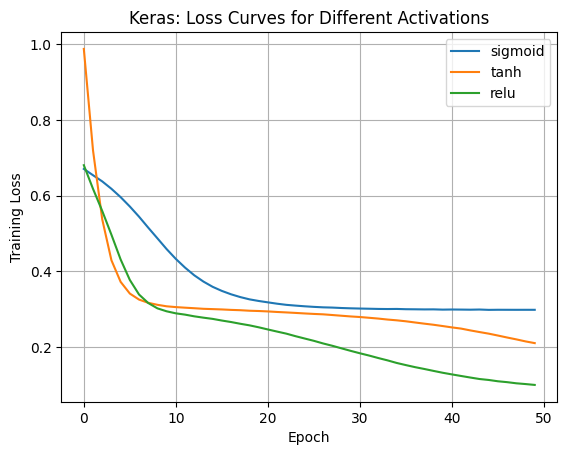

In [19]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
plt.figure()
for name, res in results_keras.items():
    plt.plot(res["losses"], label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Keras: Loss Curves for Different Activations")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
keras_table = pd.DataFrame([
    {
        "Activation": name,
        "Initial Loss": round(res["initial_loss"], 4),
        "Final Train Accuracy": round(res["train_acc"], 4),
        "Final Test Accuracy": round(res["test_acc"], 4)
    }
    for name, res in results_keras.items()
])

keras_table

,Activation,Initial Loss,Final Train Accuracy,Final Test Accuracy
0,sigmoid,0.6705,0.8700,0.865
1,tanh,0.9874,0.9162,0.920
2,relu,0.6803,0.9650,0.975


##EXERCISE 2 - Effect of Activation Function on Convergence Speed

In [16]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
for name, res in results_keras.items():
    print(
        name,
        "Converges at epoch:",
        convergence_epoch(res["losses"]),
        "| Curve:",
        "Smooth" if name != "relu" else "Fast"
    )

sigmoid Converges at epoch: 29 | Curve: Smooth
tanh Converges at epoch: None | Curve: Smooth
relu Converges at epoch: None | Curve: Fast


##EXERCISE 3

In [17]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
lr_results_keras = {}

for act in activations_keras:
    for lr in [0.0005, 0.01]:
        key = f"{act}_lr_{lr}"
        lr_results_keras[key] = train_keras(act, lr)

lr_results_keras

{'sigmoid_lr_0.0005': {'initial_loss': 0.7017185688018799,
  'train_acc': 0.8675000071525574,
  'test_acc': 0.8600000143051147,
  'losses': [0.7017185688018799,
   0.6859865784645081,
   0.6750638484954834,
   0.6668707132339478,
   0.6588138341903687,
   0.6508851647377014,
   0.642061173915863,
   0.6332791447639465,
   0.6236253976821899,
   0.6135990023612976,
   0.6029778122901917,
   0.5915240049362183,
   0.5793310403823853,
   0.5677757859230042,
   0.5539581775665283,
   0.5404142737388611,
   0.5265676379203796,
   0.5123973488807678,
   0.49808797240257263,
   0.48391029238700867,
   0.470093697309494,
   0.4564240276813507,
   0.4430578947067261,
   0.43034571409225464,
   0.4185675382614136,
   0.40685683488845825,
   0.39662230014801025,
   0.38691461086273193,
   0.3778708279132843,
   0.36957114934921265,
   0.36219409108161926,
   0.35531917214393616,
   0.34959137439727783,
   0.34402230381965637,
   0.3391064703464508,
   0.3347327411174774,
   0.3309890627861023,
  

In [23]:
# Purpose:
# This cell performs a specific step in the ML workflow such as data generation,
# preprocessing, visualization, model definition, training, or evaluation.
#
# Output:
# The output of this cell may include printed values, saved files,
# plots/graphs, or trained model parameters depending on the code below.
# ------------------------------------------------------------
keras_lr_table = pd.DataFrame([
    {
        "Activation + LR": key,
        "Initial Loss": round(res["initial_loss"], 4),
        "Final Train Accuracy": round(res["train_acc"], 4),
        "Final Test Accuracy": round(res["test_acc"], 4)
    }
    for key, res in lr_results_keras.items()
])

keras_lr_table


,Activation + LR,Initial Loss,Final Train Accuracy,Final Test Accuracy
0,sigmoid_lr_0.0005,0.7017,0.8675,0.860
1,sigmoid_lr_0.01,0.6737,0.9575,0.965
2,tanh_lr_0.0005,0.6827,0.8863,0.885
3,tanh_lr_0.01,0.3950,0.9737,0.995
4,relu_lr_0.0005,0.7017,0.8988,0.895
5,relu_lr_0.01,0.4705,0.9700,0.985
